# Tâche 8

In [1]:
#Imports utiles

from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.electronic_structure import plotter

In [2]:
#On récupère la structure de bandes

with MPRester("8M635zkNlb27ZqrS") as mp:
    band = mp.get_bandstructure_by_material_id("mp-581024")

## 1.Bande interdite 

#### Caractéristiques de la bande interdite

In [3]:
#On récupère les infos de la bande interdite
bande_interdite = band.get_band_gap()

print("Bande interdite directe ? " + str(bande_interdite.get('direct')),", la bande interdite est donc directe.")
print("La largeur de la bande est interdite vaut ",bande_interdite['energy'], "eV.")
print("La transition dans la bande interdite est la suivante : " + str(bande_interdite.get('transition')),".")


print('\n\n Numéros des bandes pour la VBM (valence band maximum) : ',band.get_vbm()['band_index'])
print('Numéros de la bande pour la CBM (conduction band minimum) : ',band.get_cbm()['band_index'])

print("\nLa valeur maximale d'énergie pour la bande de valence(VBM) est atteinte dans trois bandes différentes : 13,14 et 15.")

print("La valeur minimale d'énergie pour la bande de conduction(CBM) est atteinte à la bande 16.")

Bande interdite directe ? True , la bande interdite est donc directe.
La largeur de la bande est interdite vaut  0.8613999999999997 eV.
La transition dans la bande interdite est la suivante : \Gamma-\Gamma .


 Numéros des bandes pour la VBM (valence band maximum) :  defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14, 15]})
Numéros de la bande pour la CBM (conduction band minimum) :  defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})

La valeur maximale d'énergie pour la bande de valence(VBM) est atteinte dans trois bandes différentes : 13,14 et 15.
La valeur minimale d'énergie pour la bande de conduction(CBM) est atteinte à la bande 16.


#### Graphe des bandes d'énergie

[(0.0, 0.8613999999999997), (2.090550198783168, 0.8613999999999997), (2.090550198783168, 0.8613999999999997)]
[(0.0, 0.0), (2.090550198783168, 0.0), (2.090550198783168, 0.0)]
[array([0.        , 0.04782422, 0.09564846, 0.14347268, 0.19129691,
       0.23912114, 0.28694537, 0.33476959, 0.38259383, 0.43041805,
       0.47824227, 0.52606651, 0.57389073, 0.62171496, 0.66953919,
       0.71736342]), array([0.71736342, 0.76219863, 0.80703384, 0.85186906, 0.89670427,
       0.94153948, 0.9863747 , 1.03120991, 1.07604513]), array([1.07604513, 1.11831616, 1.16058722, 1.20285826, 1.2451293 ,
       1.28740036, 1.32967139]), array([1.32967139, 1.37722632, 1.42478124, 1.47233617, 1.5198911 ,
       1.56744602, 1.61500095, 1.66255587, 1.7101108 , 1.75766572,
       1.80522065, 1.85277557, 1.9003305 , 1.94788542, 1.99544035,
       2.04299527, 2.0905502 ]), array([2.0905502 , 2.13833904, 2.18612789, 2.23391673, 2.28170556,
       2.3294944 , 2.37728325, 2.42507209, 2.47286094, 2.52064978,
       2.5

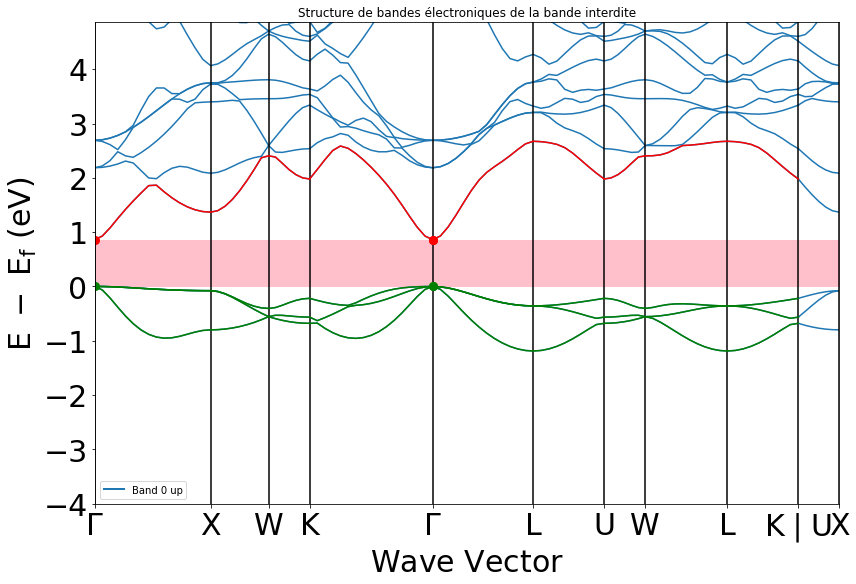

In [4]:
#On récupère toutes les données nécessaires pour tracer le graphe par la suite
graphe = plotter.BSPlotter(band)
bs_plot_data = graphe.bs_plot_data()
distance = bs_plot_data.get('ticks').get('distance')
distances = bs_plot_data.get('distances')
energy = bs_plot_data.get('energy')
get_band_gap = band.get_band_gap()


# On récupère le plot
graphe.get_plot()

# On met les bandes contenant la VBM (en vert) et la CBM (en rouge) en couleur
for i in range(9):
    plt.plot(distances[i],energy.get('1')[i][13],'green')
    plt.plot(distances[i],energy.get('1')[i][14],'green')
    plt.plot(distances[i],energy.get('1')[i][15],'green')
    plt.plot(distances[i],energy.get('1')[i][16],'red')
    
# On marque la CBM sur le graphe
cbm_coord = bs_plot_data.get('cbm')
print(cbm_coord) # Coordonnées des minima de la bande de conduction
for i in range(len(cbm_coord)):
    (x,y) = cbm_coord[i]
    plt.plot(x, y, 'or', markersize = 8)

# On marque les VBM sur le graphe  
vbm_coord = bs_plot_data.get('vbm')
print(vbm_coord) # Coordonnées des maxima de la bande de valence
for i in range(len(vbm_coord)):
    (x,y) = vbm_coord[i]
    plt.plot(x, y, 'og', markersize = 8)

# On met en évidence la bande interdite
plt.fill_between(np.linspace(distance[0], distance[-1], 500), 0, get_band_gap.get('energy'), color = "pink")

# Pour le titre 
plt.title('Structure de bandes électroniques de la bande interdite')

print("\n\n Commentaires par rapport au graphe")
print("La première bande de conduction est en rouge (bande 16), les dernières bandes de valence sont en vert (13,14 et 15). Les points rouges représentent les minima de la première bande de conduction (minima qui ont la même énergie, c'est-à-dire 0.8614 eV). Les points verts sont les maxima des dernières bandes de valence (maxima correspondant à la mêmes énergie, c'est-à-dire 0.0 eV). En rose est représentée la bande interdite.")

## 2.Dispersion dans la dernière bande de valence et la première bande de conduction

In [5]:
#On définit une fonction permettant de calculer la pente à partir des coordonnées de deux points

def pente(a,b) : 
    pente = abs(b[-1]-b[0])/(a[-1]-a[0])
    return np.array([pente,a[0],b[0],a[-1]-a[0],b[-1]-b[0]])

##### Calculs des pentes pour la dernière bande de valence

In [6]:
d = len(distances)
pentes_valence = np.zeros((len(distances), 5))

indice_max_val = 0
indice_min_val = 0

pente_min_val = 0
pente_max_val = 0

#On calcule les pentes extrêmes et leur indice
for i in range(len(distances)) : 
    pentes_valence[i] = pente(distances[i],energy["1"][i][15]) #15 est le numéro de la dernière bande de valence
    if i == 0: 
        pente_min_val = pente(distances[i],energy["1"][i][15])[0] 
        pente_max_val = pente(distances[i],energy["1"][i][15])[0] 
    else :
        if (pente_min_val > pentes_valence[i][0]) :
            pente_min_val = pentes_valence[i][0] 
            indice_min_val = i
        if pente_max_val < pentes_valence[i][0]  :
            pente_max_val = pentes_valence[i][0] 
            indice_max_val = i
            
pentes_valence = pentes_valence.T

#### Calculs des pentes pour la première bande de conduction

In [7]:
pentes_conduction = np.zeros((len(distances), 5))

indice_max_cond = 0
indice_min_cond = 0

#On calcule les pentes extrêmes et leur indice

pente_min_cond = 0
pente_max_cond = 0
for i in range(len(distances)) : 
    pentes_conduction[i] = pente(distances[i],energy["1"][i][16]) #16 est le numéro de la première bande de conduction 
    if i == 0: 
        pente_min_cond = pente(distances[i],energy["1"][i][16])[0] 
        pente_max_cond = pente(distances[i],energy["1"][i][16])[0] 
    else :
        if (pente_min_cond > pentes_conduction[i][0]) :
            pente_min_cond = pentes_conduction[i][0] 
            indice_min_cond= i
        if pente_max_cond < pentes_conduction[i][0]  :
            pente_max_cond = pentes_conduction[i][0] 
            indice_max_cond = i
pentes_conduction = pentes_conduction.T

Commentaires sur le graphe : 

On peut remarquer en trait continu rouge la première bande de conduction et trait continu vert la dernière bande de valence. 
Les points verts représentent les points auxquels l'énergie maximale des bandes de valence est atteinte. Les points rouges représentent les points auxquels l'énergie minimale des bandes de conduction est atteinte.
Les flèches représentent respectivement les directions pour lesquelles il y a le plus (en orange) et le moins (en mauve) de dispersion pour la dernière bande de valence et première bande de conduciton, la première bande de conduction étant la bande 16 et la dernière bande de valence étant la bande 15 pour rappel.


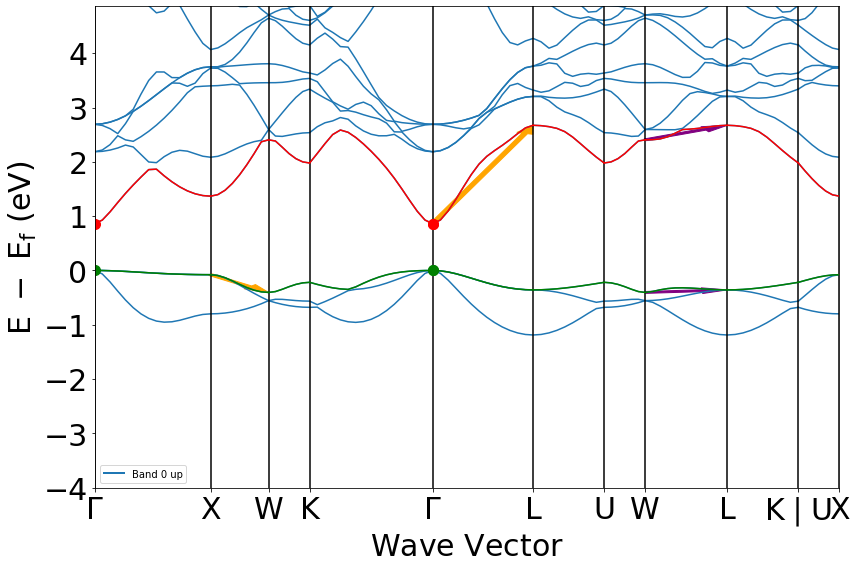

In [8]:
#On trace les graphes

graphe.get_plot()

#On récupère le valence band maximum et le conduction band minimum
Vbm = bs_plot_data.get("vbm")
Cbm = bs_plot_data.get("cbm")
    
#On trace la première bande de conduction et la dernière bande de valence
for i in range(len(distances)):
    plt.plot(distances[i],energy['1'][i][15],'green')
    plt.plot(distances[i],energy['1'][i][16],'red')
# On trace en rouge les points VBM et en vert les points CBM  
for i in range(len(Vbm)):
    x, y= Vbm[i]
    plt.plot(x, y, 'og', markersize=10)
for i in range(len(Cbm)):
    x, y = Cbm[i]
    plt.plot(x ,y ,'or',markersize=10)

#On place les flèches représentant les vecteurs de dispersion

plt.arrow(pentes_conduction[1][indice_max_cond], pentes_conduction[2][indice_max_cond], pentes_conduction[3][indice_max_cond], pentes_conduction[4][indice_max_cond], color='orange', width=0.035, length_includes_head=True)
plt.arrow(pentes_conduction[1][indice_min_cond], pentes_conduction[2][indice_min_cond], pentes_conduction[3][indice_min_cond], pentes_conduction[4][indice_min_cond], color='purple', width=0.035, length_includes_head=True)

plt.arrow(pentes_valence[1][indice_max_val], pentes_valence[2][indice_max_val], pentes_valence[3][indice_max_val], pentes_valence[4][indice_max_val], color='orange', width=0.035, length_includes_head=True)
plt.arrow(pentes_valence[1][indice_min_val], pentes_valence[2][indice_min_val], pentes_valence[3][indice_min_val], pentes_valence[4][indice_min_val], color='purple', width=0.035, length_includes_head=True)

print("Commentaires sur le graphe : \n")
print("On peut remarquer en trait continu rouge la première bande de conduction et trait continu vert la dernière bande de valence. \nLes points verts représentent les points auxquels l'énergie maximale des bandes de valence est atteinte. Les points rouges représentent les points auxquels l'énergie minimale des bandes de conduction est atteinte.\nLes flèches représentent respectivement les directions pour lesquelles il y a le plus (en orange) et le moins (en mauve) de dispersion pour la dernière bande de valence et première bande de conduciton, la première bande de conduction étant la bande 16 et la dernière bande de valence étant la bande 15 pour rappel.")

## 3.Calcul de la masse effective

##### Pour calculer la masse effective, il a été vu qu'il faut utiliser la formule vu au cours : $m^* = \hbar^{2} (\frac{\partial^2 E} {\partial^2 k})^{-1}$.  Comme il est demandé de considérer une dispersion parabolique, nous devons donc trouver les coefficients pour l'expression parabolique qui permet d'approximer le graphe de l'énergie par une parabole. On doit donc récupérer les énergies en 

In [9]:
#On récupère donc les 3 points qui vont nous servir à l'interpolation 
K_interpolation_v = np.zeros(3)#v pour valence
E_interpolation_v = np.zeros(3)
K_interpolation_c = np.zeros(3)#c pour conduction
E_interpolation_c = np.zeros(3)

#On prend des valeurs voisines des points VBM

#Pour les vecteurs d'onde
K_interpolation_v[0] = distances [3] [-3]
K_interpolation_v[1] = vbm_coord[1][0]
K_interpolation_v[2] = distances [4] [2]
#Pour les énergies
E_interpolation_v[0] = energy.get('1')[3][15][-3]
E_interpolation_v[1] = vbm_coord[1][1]
E_interpolation_v[2] = energy.get('1')[4][15][2]

#On prend des valeurs voisines des points CBM

#Pour les vecteurs d'onde
K_interpolation_c[0] = distances [3] [-3]
K_interpolation_c[1] = cbm_coord[1][0]
K_interpolation_c[2] = distances [4] [2]
#Pour les énergies
E_interpolation_c[0] = energy.get('1')[3][16][-3]
E_interpolation_c[1] = cbm_coord[1][1]
E_interpolation_c[2] = energy.get('1')[4][16][2]

Commentaires sur le graphe :

La focntion interpolant la première bande de conduction est de la forme :  25.383101411310847 k²+ -106.10708337103578 k+ 111.74927443362476
La focntion interpolant la dernière bande de valence est de la forme :  -1.8560315204708062 k²+ 7.64155511664151 k+ -7.863454163015988
On peut remarquer en trait continu rouge la première bande de conduction et trait continu vert la dernière bande de valence. 
Les points verts représentent les vecteurs points auxquels l'énergie maximale des bandes de valence est atteinte. Les points rouges représentent les points auxquels l'énergie minimale des bandes de conduction est atteinte.
 On peut voir en mauve l'interpolation de degré deux pour la première bande de conduction et en orange celle pour la dernière bande de valence.


On remarque qu'une interpolation du deuxième degré est une très bonne approximation à petite échelle.


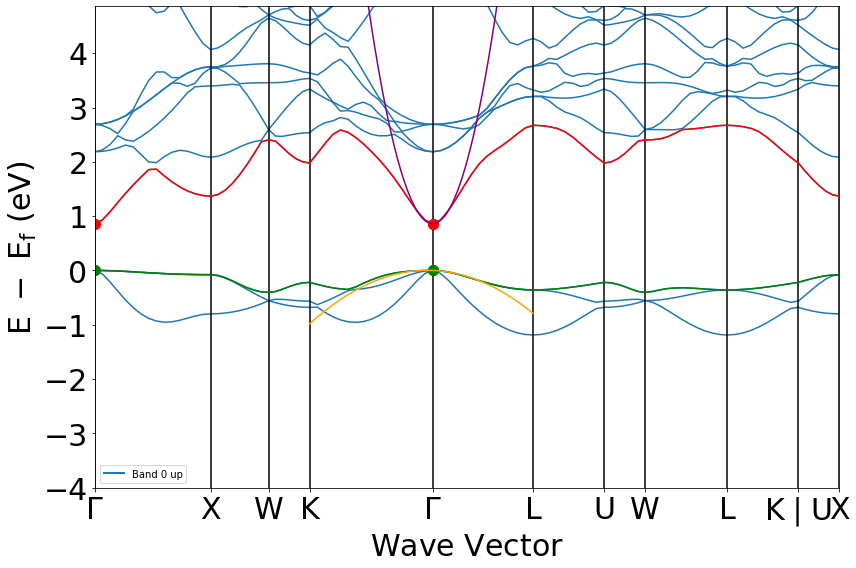

In [10]:
#Maintenant qu'on a les points, on peut faire l'interpolation et tracer le graphe

#On trace le graphe avec les bandes électroniques
graphe.get_plot()

#On trace la première bande de conduction et la dernière bande de valence
for i in range(len(distances)):
    plt.plot(distances[i],energy.get('1')[i][15],'green')
    plt.plot(distances[i],energy.get('1')[i][16],'red')
# On trace en vert les points VBM et en rouge les points CBM 
for j in range(len(vbm_coord)):
    x, y= vbm_coord[j]
    plt.plot(x, y, 'og', markersize=10)
for k in range(len(cbm_coord)):
    x, y = cbm_coord[k]
    plt.plot(x ,y ,'or',markersize=10)
    
#On crée la focntion d'interpolation de degré deux pour la dernière bande de valence et on la trace
fonction_VBM = np.polyfit(K_interpolation_v, E_interpolation_v, 2) 
intervalle_VBM = np.linspace(distances[3][0],distances[4][-1],500)
plt.plot(intervalle_VBM,np.polyval(fonction_VBM,intervalle_VBM),'orange')

#On crée la focntion d'interpolation de degré deux pour la première bbande de conduction et on la trace
fonction_CBM = np.polyfit(K_interpolation_c, E_interpolation_c, 2)
intervalle_CBM = np.linspace(distances[3][0],distances[4][-1],500)
plt.plot(intervalle_CBM,np.polyval(fonction_CBM,intervalle_CBM),'purple')

print("Commentaires sur le graphe :\n")
print("La focntion interpolant la première bande de conduction est de la forme : ",fonction_CBM[0],"k²+",fonction_CBM[1],"k+",fonction_CBM[2])
print("La focntion interpolant la dernière bande de valence est de la forme : ",fonction_VBM[0],"k²+",fonction_VBM[1],"k+",fonction_VBM[2])
print("On peut remarquer en trait continu rouge la première bande de conduction et trait continu vert la dernière bande de valence. \nLes points verts représentent les vecteurs points auxquels l'énergie maximale des bandes de valence est atteinte. Les points rouges représentent les points auxquels l'énergie minimale des bandes de conduction est atteinte.\n On peut voir en mauve l'interpolation de degré deux pour la première bande de conduction et en orange celle pour la dernière bande de valence.\n\n")
print("On remarque qu'une interpolation du deuxième degré est une très bonne approximation à petite échelle.")


##### Calculs des masse effectives : il suffit de reprendre la formule plus haut et de dériver deux fois les expressions des interpolations données plus haut (ce qui revient à multiplier par deux le coefficient du ${k}^{2}$ et de les injecter dans l'équation 

In [11]:
#Calcul de la constane de Planck
h = (6.62607*10**(-34))/(2*np.pi*1.6021766*10**(-19)) #[eV]

#Calcul pour la première bande de conduction 
m_eff_valence = h**2/(2*fonction_CBM[0])

#Calcul pour la dernière bande de valence 
m_eff_conduction = h**2/(2*fonction_VBM[0])

print("La masse effective à la base de la première bande de conduction vaut : ",m_eff_conduction,"[kg]")
print("La masse effective au sommet de la dernière bande de valence vaut : ",m_eff_valence, "[kg]")

La masse effective à la base de la première bande de conduction vaut :  -1.1671218248914085e-31 [kg]
La masse effective au sommet de la dernière bande de valence vaut :  8.534082814098461e-33 [kg]
